# CNN Case Study

This case study focuses on developing a Convolutional Neural Network (CNN) for the task of classifying various fruits and vegetables (kritikseth/fruit-and-vegetable-image-recognition). We aim to build a robust image recognition model capable of accurately identifying different produce items from a diverse dataset.


## What is a Convolutional Neural Network (CNN)?
##### A Convolutional Neural Network (CNN), also known as a ConvNet, is a specialized type of Artificial Neural Network primarily designed for processing and analyzing visual data, such as images and videos. Unlike traditional neural networks, CNNs are specifically structured to leverage the spatial relationships within data, making them highly effective for tasks like image classification, object detection, and image recognition. They are inspired by the organization of the animal visual cortex, where individual neurons respond to specific regions of the visual field.




## How a CNN Works (A Short Idea)

A CNN processes images by passing them through a series of layers, each designed to learn different aspects of the image.

### Input Layer:

The journey begins with the raw image data (e.g., a 224x224 pixel color image, represented as a 3D array of pixel values).

### Convolutional Layers:

These are the core building blocks. A small filter (or kernel) slides across the input image, performing a mathematical operation called convolution.
Each filter learns to detect specific features, such as edges, textures, or simple shapes.
The output of a convolutional layer is called a feature map, which highlights where these learned features are present in the image.
Activation Functions (e.g., ReLU): After convolution, a non-linear activation function (like Rectified Linear Unit - ReLU) is applied to the feature map. This introduces non-linearity, allowing the network to learn more complex patterns.

### Pooling Layers (e.g., Max Pooling):

These layers reduce the spatial dimensions (width and height) of the feature maps, effectively downsampling the image.
For example, Max Pooling takes the maximum value from a small region, summarizing the features present in that area.
This helps in:
Reducing the computational load.
Making the network more robust to small shifts or distortions in the input image.

### Flattening:

After several convolutional and pooling layers, the resulting 3D feature maps are converted (flattened) into a single, long 1D vector. This transformation prepares the data for the next type of layer.

### Fully Connected (Dense) Layers:

These are standard neural network layers, similar to those in a Multi-Layer Perceptron. They take the flattened feature vector as input.
These layers learn higher-level reasoning and combine the features extracted by the convolutional layers to make final predictions.
The Output Layer (the last Dense layer) typically uses an activation function like Softmax for multi-class classification, outputting probabilities for each class (e.g., "this is 90% an apple, 5% a banana, 5% an orange").

### Training (Backpropagation):

During training, the CNN processes images and makes predictions.
A Loss Function measures how far off these predictions are from the true labels.
An Optimizer (e.g., Adam) then uses backpropagation (a process of calculating gradients) to adjust the weights and biases of all the layers in the network, iteratively minimizing the loss and improving accuracy.

##### just some downloading process

In [ ]:
'''
!pip install -q kaggle

from google.colab import files
files.upload()
'''

'\n!pip install -q kaggle\n\nfrom google.colab import files\nfiles.upload()\n'

In [ ]:
'''
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kagglehub
'''

'\n!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!pip install -q kagglehub\n'

In [3]:
from google.colab import drive
import shutil # For copying files/folders
import os

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
kaggle_dataset_slug = "kritikseth/fruit-and-vegetable-image-recognition"

import kagglehub

print(f"Downloading dataset: {kaggle_dataset_slug}...")
local_download_path = kagglehub.dataset_download(kaggle_dataset_slug)
print(f"Dataset downloaded to local path: {local_download_path}")

'''

'\nkaggle_dataset_slug = "kritikseth/fruit-and-vegetable-image-recognition"\n\nimport kagglehub\n\nprint(f"Downloading dataset: {kaggle_dataset_slug}...")\nlocal_download_path = kagglehub.dataset_download(kaggle_dataset_slug)\nprint(f"Dataset downloaded to local path: {local_download_path}")\n\n'

In [ ]:
'''
drive_dataset_path = f'/content/drive/My Drive/KaggleDatasets/{kaggle_dataset_slug.replace("/", "_")}' # Example path

# Create the destination directory in Drive if it doesn't exist
os.makedirs(drive_dataset_path, exist_ok=True)

# 4. Copy the downloaded dataset from local storage to Google Drive
print(f"Copying dataset from {local_download_path} to {drive_dataset_path}...")
shutil.copytree(local_download_path, drive_dataset_path, dirs_exist_ok=True)
print("Dataset copied to Google Drive successfully!")

'''

'\ndrive_dataset_path = f\'/content/drive/My Drive/KaggleDatasets/{kaggle_dataset_slug.replace("/", "_")}\' # Example path\n\n# Create the destination directory in Drive if it doesn\'t exist\nos.makedirs(drive_dataset_path, exist_ok=True)\n\n# 4. Copy the downloaded dataset from local storage to Google Drive\nprint(f"Copying dataset from {local_download_path} to {drive_dataset_path}...")\nshutil.copytree(local_download_path, drive_dataset_path, dirs_exist_ok=True)\nprint("Dataset copied to Google Drive successfully!")\n\n'

## EDA

In [5]:
#getting the downloaded dataset and analyzing it

drive_dataset_path = '/content/drive/My Drive/KaggleDatasets/kritikseth_fruit-and-vegetable-image-recognition'

if os.path.exists(drive_dataset_path):
    print(f"\nDataset found in Google Drive at: {drive_dataset_path}")
    print("Contents of the dataset directory:")
    for item in os.listdir(drive_dataset_path):
        print(f"- {item}")
else:
    print(f"\nError: Dataset not found at {drive_dataset_path}")
    print("Please ensure the path is correct and the dataset was copied to Drive in a previous session.")


Dataset found in Google Drive at: /content/drive/My Drive/KaggleDatasets/kritikseth_fruit-and-vegetable-image-recognition
Contents of the dataset directory:
- validation
- test
- train


In [28]:
#the directorys present in the downloaded package of data
train_dir = os.path.join(drive_dataset_path, 'train')
validation_dir = os.path.join(drive_dataset_path, 'validation')
test_dir = os.path.join(drive_dataset_path, 'test')

In [29]:
#analyzing the distribution of data
def count_images_per_class(dir):
  class_names = []
  counts = []


  classes = os.listdir(dir)

  for clas in classes:
    class_path = os.path.join(dir, clas)
    image_count = len(os.listdir(class_path))
    #class_counts[clas] = image_count
    class_names.append(clas)
    counts.append(image_count)

  #class_counts = dict(zip(class_names, counts))

  return class_names, counts

In [7]:
dirs = [train_dir, validation_dir, test_dir]
dir_names = ["Training Set", "Validation Set", "Test Set"] # For better titles


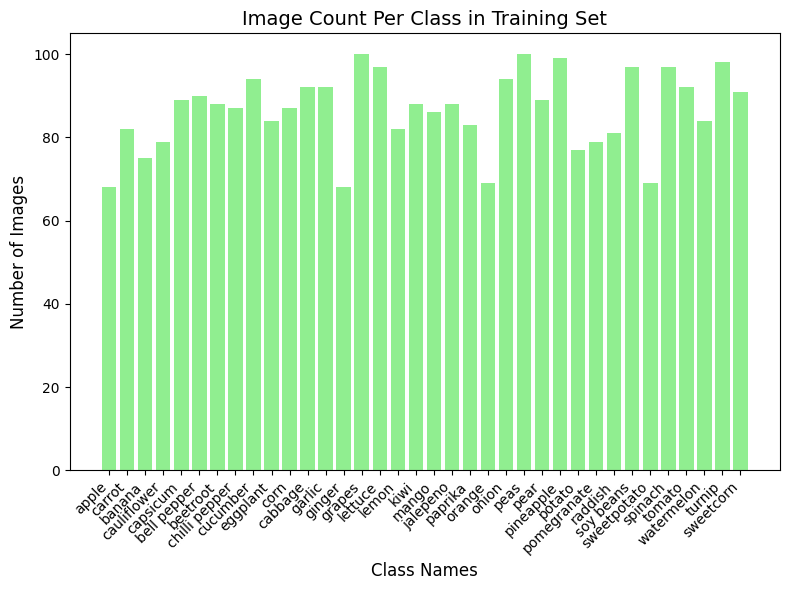

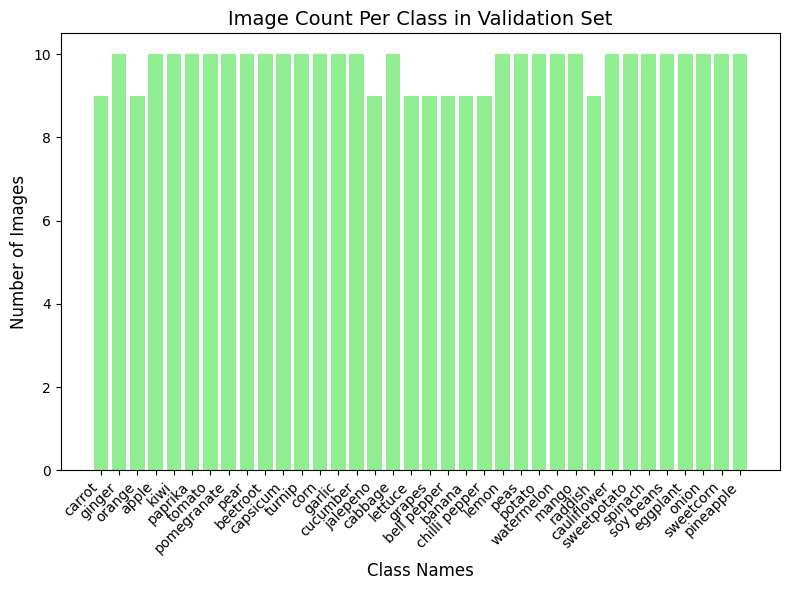

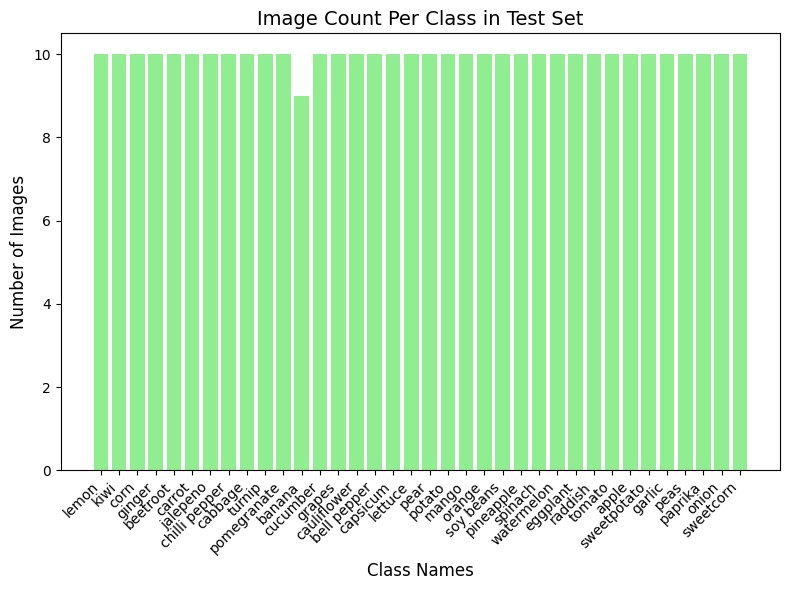

In [ ]:
import matplotlib.pyplot as plt
#checking the data distributiom of each class
totals = []
for i, dir in enumerate(dirs):
    class_names, counts = count_images_per_class(dir)

    totals.append(sum(counts))

    plt.figure(figsize=(8, 6)) # Increase figure size for better spacing
    plt.bar(class_names, counts, color='lightgreen') # Changed color for variety

    # Add labels and title
    plt.xlabel('Class Names', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.title(f'Image Count Per Class in {dir_names[i]}', fontsize=14)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate by 45 degrees, align right

    # Automatically adjust subplot parameters for a tight layout
    plt.tight_layout()

    plt.show()

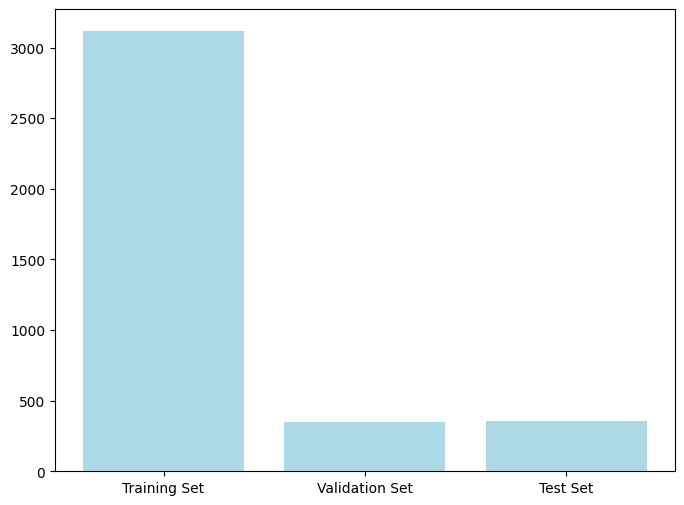

In [ ]:
#distribution size of each
plt.figure(figsize=(8, 6))
plt.bar(dir_names, totals, color='lightblue')
plt.show()


In [8]:
import os
import random

class_names = ['apple', 'carrot', 'banana', 'cauliflower', 'capsicum', 'bell pepper', 'beetroot', 'chilli pepper', 'cucumber', 'eggplant', 'corn', 'cabbage', 'garlic', 'ginger', 'grapes', 'lettuce', 'lemon', 'kiwi', 'mango', 'jalepeno', 'paprika', 'orange', 'onion', 'peas', 'pear', 'pineapple', 'potato', 'pomegranate', 'raddish', 'soy beans', 'sweetpotato', 'spinach', 'tomato', 'watermelon', 'turnip', 'sweetcorn']


In [ ]:
from PIL import Image

def check_dimensions(dir):
  dimensions = []

  for class_name in class_names[2:4]:
    class_dir = os.path.join(dir, class_name)
    for image_name in os.listdir(class_dir):
      try:
        image_path = os.path.join(class_dir, image_name)
        with Image.open(image_path) as img:
          dimensions.append(img.size)
      except Exception as e:
        print(f"Error processing {image_path}: {e}")

  return dimensions


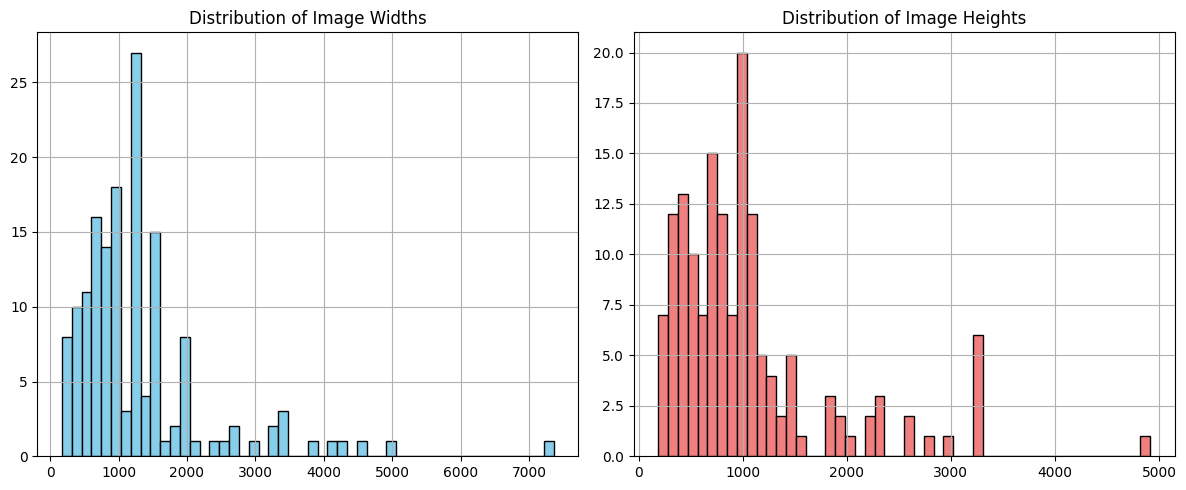

In [ ]:
#checking the size distribution of images present

import pandas as pd

image_dims = check_dimensions(train_dir)

df_dims = pd.DataFrame(image_dims, columns=['Width', 'Height'])


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
df_dims['Width'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Widths')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
df_dims['Height'].hist(bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Image Heights')

plt.tight_layout()
plt.show()

## Data Preprocessing

note : the below code is about manually resizing image using oepncv - just for further refernce on preprocessing tools

In [ ]:
'''
import os
import cv2 # OpenCV library

def resize_images_in_directory_cv2(source_dir, target_dir, target_size=(224, 224)):

    processed_count = 0
    skipped_count = 0

    for class_name in os.listdir(source_dir):
        class_source_path = os.path.join(source_dir, class_name)

        # Check if it's a directory (i.e., a class folder)
        current_target_class_dir = os.path.join(target_dir, class_name)
        if not os.path.exists(current_target_class_dir):
            os.makedirs(current_target_class_dir) # Create the class subfolder in target_dir

            # Iterate through each item (expecting images) within the class folder
        for image_file_name in os.listdir(class_source_path):
            source_image_path = os.path.join(class_source_path, image_file_name)
            target_image_path = os.path.join(current_target_class_dir, image_file_name)

                # Check for common image file extensions and ensure it's a file
            try:
              img = cv2.imread(source_image_path)

              if img is None:
                  print(f"Warning: Could not load image {source_image_path}. Skipping.")
                  skipped_count += 1
                  continue

                        # Resize the image
                  resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

                        # Save the resized image
                  cv2.imwrite(target_image_path, resized_img)
                  processed_count += 1

            except Exception as e:
                  print(f"Error processing {source_image_path}: {e}")
                  skipped_count += 1
                # else:
                #     # Optionally, print files that are skipped
                #     if os.path.isfile(source_image_path):
                #         print(f"Skipping non-image file: {source_image_path}")
                #     else:
                #         print(f"Skipping non-file item in class folder: {source_image_path}")
        # else:
        #     print(f"Skipping non-directory item in source_dir: {class_source_path}")

    print(f"\n--- Resizing Complete ---")
    print(f"Processed {processed_count} images.")
    print(f"Skipped {skipped_count} files due to errors or unsupported format.")
    print(f"Resized images saved to: {target_dir}")
#- How to use this function ---

# Define your source and target directories
target_dataset_path = '/content/drive/My Drive/KaggleDatasets/fruit-and-vegetable-image-recognition-resized'
# Define your desired target size (width, height)
# Common sizes: (224, 224), (256, 256)
target_dimension = (224, 224)

# Run the resizing process
# CAUTION: This will create new files. Ensure target_dataset_path is empty or safe to overwrite.
#resize_images_in_directory_cv2(source_dataset_path, target_dataset_path, target_dimension)
'''

In [ ]:
#from ctypes import resize
'''
for i, dir in enumerate(dirs):
  target_path = os.path.join(target_dataset_path, dir_names[i])
  resize_images_in_directory_cv2(dir, target_path, target_dimension)
'''


--- Resizing Complete ---
Processed 0 images.
Skipped 1 files due to errors or unsupported format.
Resized images saved to: /content/drive/My Drive/KaggleDatasets/fruit-and-vegetable-image-recognition-resized/Training Set

--- Resizing Complete ---
Processed 0 images.
Skipped 0 files due to errors or unsupported format.
Resized images saved to: /content/drive/My Drive/KaggleDatasets/fruit-and-vegetable-image-recognition-resized/Validation Set

--- Resizing Complete ---
Processed 0 images.
Skipped 0 files due to errors or unsupported format.
Resized images saved to: /content/drive/My Drive/KaggleDatasets/fruit-and-vegetable-image-recognition-resized/Test Set


### common steps included in pre-processing:

- Load Images: Read image files (e.g., JPEG, PNG) from storage into memory.

- Resize: Standardize all images to a consistent input dimension (e.g., 224x224 pixels) for the network.

- Normalize Pixel Values: Scale pixel intensities (e.g., from 0-255) to a smaller, more manageable range (e.g., 0-1) for stable model learning.

- Batching: Group multiple processed images and their corresponding labels into sets (batches) for parallel processing by the GPU.

- Optimize Data Flow: Implement techniques like caching (storing data after first processing) and prefetching (loading future data concurrently) to ensure the GPU is always fed data without waiting.

- Data Augmentation (Optional): Apply random transformations (e.g., rotations, flips) to create new training examples, improving the model's ability to generalize.

In [18]:
import tensorflow as tf

#it sets up your training data pipeline, preparing images in the correct format and batches for your deep learning model.

num_channels = 3
batch_size = 32

img_height = 128
img_width = 128

print("creating training dataset")

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    labels = 'inferred',
    label_mode ='int',
    color_mode = 'rgb',
    interpolation = 'bilinear',
    shuffle = True,
    seed = 42,
)


creating training dataset
Found 3115 files belonging to 36 classes.


- tf.keras.utils.image_dataset_from_directory(train_dir, ...): This function is designed to efficiently load image data for deep learning.

- train_dir: Specifies the path to the root directory containing your training images, where subfolders represent different classes.

- image_size=(128, 128): Resizes all loaded images to a resolution of 128x128 pixels.

- batch_size=32: Groups the images into batches of 32, which the model will process at once during training.

- labels='inferred': Automatically assigns labels to images based on the name of their parent directory (e.g., images in train_dir/apples get the label 'apples').

- label_mode='int': Converts these inferred labels into integer representations (e.g., 'apples' might become 0, 'bananas' might become 1, etc.).

- color_mode='rgb': Specifies that the images should be loaded as 3-channel color images.

- shuffle=True: Randomly shuffles the order of the images in the dataset, which is crucial for good model training.

- seed=42: Ensures that the shuffling is reproducible if you run the code again.

In [19]:
print("\nCreating validation dataset...")
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    image_size=(img_height, img_width),
    interpolation='bilinear',
    batch_size=batch_size,
    shuffle=False,            # No need to shuffle validation data
)


Creating validation dataset...
Found 351 files belonging to 36 classes.


In [20]:
print("\nCreating validation dataset...")
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    image_size=(img_height, img_width),
    interpolation='bilinear',
    batch_size=batch_size,
    shuffle=False,            # No need to shuffle test data
)


Creating validation dataset...
Found 359 files belonging to 36 classes.


In [21]:
print(len(train_ds.class_names))
len_class = len(train_ds.class_names)

36


This code scales image pixels from 0-255 to 0-1 (normalization) and optimizes data loading for faster training. It uses .map() to apply normalization, .cache() to store processed data for quicker access in later epochs, and .prefetch() with AUTOTUNE to overlap data preparation and model training.

In [22]:

#normalization

normalization_layer = tf.keras.layers.Rescaling(1./255)

AUTOTUNE = tf.data.AUTOTUNE

# Apply normalization, cache, and prefetch. Reassign back to the original variables.
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
import numpy as np

# --- Confirm dataset details ---
print("\n--- Dataset Configuration Summary ---")
print(f"Class names: {class_names}")

print(f"\nTrain dataset batches: {len(train_ds)}")
print(f"Validation dataset batches: {len(val_ds)}")
print(f"Test dataset batches: {len(test_ds)}")

# --- Inspect a Batch from each dataset (optional) ---
print("\n--- Inspecting first batch from each dataset ---")
for ds_name, ds in [("Train", train_ds), ("Validation", val_ds), ("Test", test_ds)]:
    for images_batch, labels_batch in ds.take(1):
        print(f"\n{ds_name} Batch:")
        print(f"  Images shape: {images_batch.shape}")
        print(f"  Labels shape: {labels_batch.shape}")
        print(f"  Images dtype: {images_batch.dtype}")
        print(f"  Labels dtype: {labels_batch.dtype}")
        print(f"  Min pixel value: {np.min(images_batch.numpy()):.4f}")
        print(f"  Max pixel value: {np.max(images_batch.numpy()):.4f}")
        break # Take only o


--- Dataset Configuration Summary ---
Class names: ['apple', 'carrot', 'banana', 'cauliflower', 'capsicum', 'bell pepper', 'beetroot', 'chilli pepper', 'cucumber', 'eggplant', 'corn', 'cabbage', 'garlic', 'ginger', 'grapes', 'lettuce', 'lemon', 'kiwi', 'mango', 'jalepeno', 'paprika', 'orange', 'onion', 'peas', 'pear', 'pineapple', 'potato', 'pomegranate', 'raddish', 'soy beans', 'sweetpotato', 'spinach', 'tomato', 'watermelon', 'turnip', 'sweetcorn']

Train dataset batches: 98
Validation dataset batches: 11
Test dataset batches: 12

--- Inspecting first batch from each dataset ---

Train Batch:
  Images shape: (32, 224, 224, 3)
  Labels shape: (32,)
  Images dtype: <dtype: 'float32'>
  Labels dtype: <dtype: 'int32'>
  Min pixel value: 0.0000
  Max pixel value: 1.0000

Validation Batch:
  Images shape: (32, 224, 224, 3)
  Labels shape: (32,)
  Images dtype: <dtype: 'float32'>
  Labels dtype: <dtype: 'int32'>
  Min pixel value: 0.0000
  Max pixel value: 1.0000

Test Batch:
  Images shap

#CNN Model

In [23]:
from tensorflow.keras import layers, models

#num_classes = len(train_ds.class_names) - this is also possible
num_classes = len(class_names)


#defining custom model

model = models.Sequential([
    layers.Input(shape = (img_height, img_width, num_channels)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(len_class, activation='softmax')
])

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,292,324 (16.37 MB)

 Trainable params: 4,292,324 (16.37 MB)

 Non-trainable params: 0 (0.00 B)

The code defines and configures two crucial callbacks for controlling and saving model during training:

ModelCheckpoint: This callback is set up to save entire trained model (architecture and weights) to the specified checkpoint_filepath (/content/drive/MyDrive/models/best_model.keras). It's configured to save_best_only, meaning it will only save a new version of the model if the val_loss (validation loss) improves (reaches a new minimum). This ensures you always have the best-performing model saved.

EarlyStopping: This callback monitors the val_loss (validation loss) during training. If the val_loss does not improve for patience=5 consecutive epochs, training will automatically stop. Additionally, restore_best_weights=True ensures that after training stops, the model's weights revert to those from the epoch that achieved the best val_loss, preventing overfitting.

Finally, callbacks_list groups these two configured callbacks into a list, which will then be passed to the model.fit() function to apply these behaviors during the training process.

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

checkpoint_filepath = '/content/drive/MyDrive/models/best_model.keras'

# Define the ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False, # Save the entire model (architecture + weights)
    monitor='val_loss',      # Monitor validation loss
    mode='min',              # Save when validation loss is minimized
    save_best_only=True,     # Only save the best model found so far
    verbose=1                # Print messages when a model is saved
)

# Define EarlyStopping as well
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,             # Stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True, # Restore weights from the best epoch
    verbose=1
)

callbacks_list = [
    model_checkpoint_callback,
    early_stopping_callback
]

In [24]:
print("\ncompiling the model.....")

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

print("\nModel compilation complete. Ready for training!")


compiling the model.....

Model compilation complete. Ready for training!


- The optimizer ('adam') which determines how the model's weights will be adjusted during training to minimize the loss.

- The loss function (SparseCategoricalCrossentropy) which measures how well the model is performing on its classification task.
 - `SparseCategoricalCrossentropy` is a loss function used in multi-class classification problems. It measures the dissimilarity between the predicted probability distribution and the true class, when true class labels are provided as integers (e.g., 0, 1, 2). It's commonly used when your output layer has a `softmax` activation and your labels are not one-hot encoded.
- The metrics ('accuracy') to monitor and report during training and evaluation.


In [25]:
epochs = 15
print(f"\n--- Starting Model Training for {epochs} epochs ---")
history = model.fit(
    train_ds,           # Your training dataset
    validation_data = val_ds, # Your validation dataset
    epochs=epochs, # Number of times to iterate over the entire training dataset
    callbacks=callbacks_list
)
print("\n--- Model Training Complete ---")



--- Starting Model Training for 15 epochs ---
Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0432 - loss: 3.5435
Epoch 1: val_loss improved from inf to 2.73197, saving model to /content/drive/MyDrive/models/best_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 420s 4s/step - accuracy: 0.0434 - loss: 3.5418 - val_accuracy: 0.2308 - val_loss: 2.7320
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1777 - loss: 2.8498
Epoch 2: val_loss improved from 2.73197 to 1.91775, saving model to /content/drive/MyDrive/models/best_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.1780 - loss: 2.8483 - val_accuracy: 0.4444 - val_loss: 1.9178
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3132 - loss: 2.3722
Epoch 3: val_loss improved from 1.91775 to 1.63248, saving model to /content/drive/MyDrive/models/best_model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.3135 - loss: 2.3709 - val_accuracy: 0.5185 - val_loss: 1.6325
Epoch 4/15
98/9

- Feeds the train_ds (training dataset) to the model.

- Evaluates the model's performance on the val_ds (validation dataset) at the end of each epoch.

- Runs this process for a specified number of epochs (15 in this case).

- Applies the defined callbacks_list (like EarlyStopping and ModelCheckpoint) to manage the training process, save the best model, and potentially stop early.

In [ ]:
#loading presaved model
#training is going to take a lot of time, so if ever want to resume at another time-

loaded_model = tf.keras.models.load_model(checkpoint_filepath)

# Resume training
print("\n--- Resuming Model Training ---")
history_resume = loaded_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15, # Continue for more epochs if needed
    callbacks=callbacks_list # Use the same callbacks
)
print("\n--- Resumed Training Complete ---")


--- Plotting Training History ---


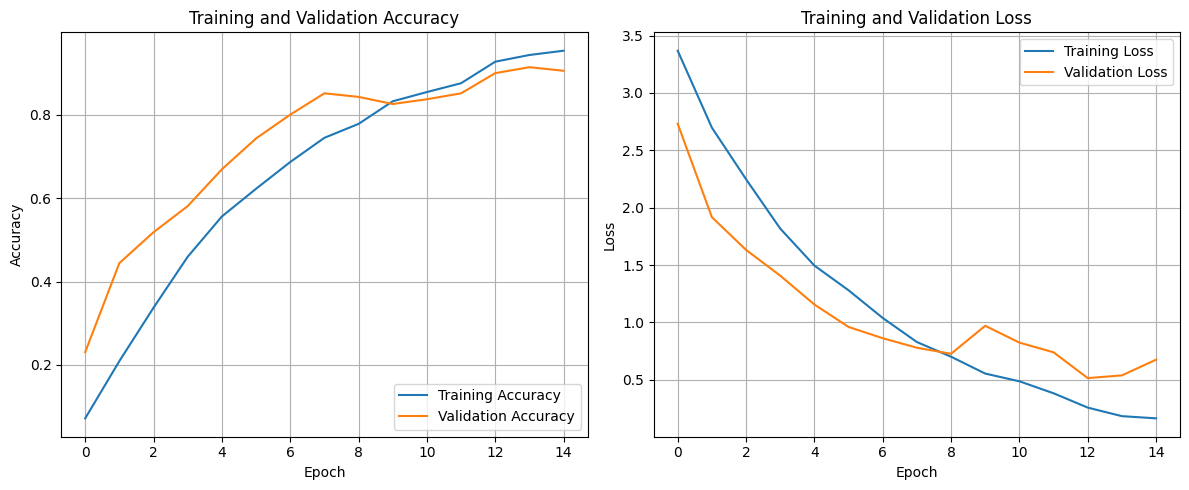


--- History Plotting Complete ---


In [26]:
import matplotlib.pyplot as plt


print("\n--- Plotting Training History ---")

# Get the accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(accuracy)) # Number of epochs

plt.figure(figsize=(12, 5))
# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True) # Add a grid for better readability

# Plot Training and Validation Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True) # Add a grid for better readability

plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

print("\n--- History Plotting Complete ---")

In [27]:
print("\n--- Evaluating Model on Test Set ---")
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\n--- Evaluation Complete ---")


--- Evaluating Model on Test Set ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 93s 8s/step - accuracy: 0.8962 - loss: 0.7304

Test Loss: 0.5073
Test Accuracy: 0.9025

--- Evaluation Complete ---


## Conclusion


Based on the final evaluation, the model achieved a **Test Accuracy of 90.25%** and a **Test Loss of 0.5073** on the unseen test dataset. This indicates that, after training and optimization, the Convolutional Neural Network demonstrates strong generalization capabilities, successfully classifying fruits and vegetables with high precision. The low test loss further confirms that the model's predictions align well with the true labels for new, unobserved data.